In [1]:
import scipy.io
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import patches

In [2]:
train_dir = './hands/training_dataset/training_data/'
image_dir = 'images/'
annot_dir = 'annotations/'

In [2]:
def coords_from_mat(mat_filepath):
    ''' 
    This extracts a rotated bbox from the .mat file
    '''
    mat = scipy.io.loadmat(mat_filepath)
    coords = []
    i = 0
    for box in mat['boxes'][0]:
        coords.append(list())
        c = 0
        for d in box[0][0]:
            if c > 3:
                break
            coords[i].append((d[0][0], d[0][1]))
            c += 1
        i += 1
    return coords

In [ ]:
# function to extract bounding boxes from an annotation file
def extract_boxes(filename):
    boxes = list()
    for box in root.findall('.//bndbox'):
        xmin = int(box.find('xmin').text)
        ymin = int(box.find('ymin').text)
        xmax = int(box.find('xmax').text)
        ymax = int(box.find('ymax').text)
        coors = [xmin, ymin, xmax, ymax]
        boxes.append(coors)
    # extract image dimensions
    width = int(root.find('.//size/width').text)
    height = int(root.find('.//size/height').text)
    return boxes, width, height

In [20]:
ex_image = os.listdir(train_dir + image_dir)[0]

img_filename = os.listdir(train_dir + image_dir)[0]
ann_filename = train_dir +annot_dir +img_filename[:-4] +'.mat'

In [21]:
coords_from_mat(ann_filename)

[[(340.88588546793284, 317.2589744920444),
  (313.91803610069434, 315.9417423538337),
  (312.66313413991, 341.63349862623517),
  (339.6309835071485, 342.95073076444584)],
 [(226.65472181441544, 623.7092861267517),
  (229.87468995028996, 635.2692084969042),
  (256.2276311267607, 627.9287067047895),
  (253.00766299088616, 616.3687843346371)],
 [(247.70079438319215, 678.1495951321347),
  (248.9854801266116, 700.1120536133851),
  (280.3580291462194, 698.2769281653564),
  (279.07334340279994, 676.3144696841059)],
 [(212.68574828865448, 748.180765714358),
  (203.68680073095302, 707.156151848366),
  (153.49072229958043, 718.166904536538),
  (162.48966985728188, 759.19151840253)],
 [(258.1894725609103, 788.9658429985078),
  (281.16346861555996, 759.9624724136785),
  (235.9869980273246, 724.1775261771194),
  (213.01300197267494, 753.1808967619487)],
 [(348.6284728614119, 879.28279280372),
  (341.312703609176, 915.5523326443085),
  (377.7048604719211, 922.8928344364233),
  (385.020629724157, 886

In [23]:
mat = scipy.io.loadmat(ann_filename)
coords = []
i = 0

In [29]:
boxes = mat['boxes'][0]

In [82]:
def get_bbox(filename):
    mat = scipy.io.loadmat(filename)
    mat['boxes'][0]
    m_boxes = list()
    for i,box in enumerate(mat['boxes'][0]):
        tmp = list()
        box_coords = box[0][0]
        for j,coord in enumerate(box_coords):
            if j >3:
                break
            tmp.append(tuple(coord[0]))
        x_min = min([x_c for x_c,y_c in tmp])
        y_min = min([y_c for x_c,y_c in tmp])
        x_max = max([x_c for x_c,y_c in tmp])
        y_max = max([y_c for x_c,y_c in tmp])
        
        m_boxes.append([x_min,y_min,x_max,y_max])
    return m_boxes

In [86]:
# ex_image = os.listdir(train_dir + image_dir)[0]

# img_filename = os.listdir(train_dir + image_dir)[0]
# ann_filename = train_dir +annot_dir +img_filename[:-4] +'.mat'
for im in os.listdir(train_dir + image_dir):
    img_filename = train_dir +annot_dir +im
    ann_filename = train_dir +annot_dir +im[:-4] +'.mat'
    print(im)
    print(get_bbox(ann_filename))

Poselet_134.jpg
[[312.66313413991, 315.9417423538337, 340.88588546793284, 342.95073076444584], [226.65472181441544, 616.3687843346371, 256.2276311267607, 635.2692084969042], [247.70079438319215, 676.3144696841059, 280.3580291462194, 700.1120536133851], [153.49072229958043, 707.156151848366, 212.68574828865448, 759.19151840253], [213.01300197267494, 724.1775261771194, 281.16346861555996, 788.9658429985078], [341.312703609176, 879.28279280372, 385.020629724157, 922.8928344364233]]
Inria_336.jpg
[[377.7935005256426, 99.11467322825854, 432.61826418024, 141.88532677174146]]
Buffy_198.jpg
[[473.7000740466505, 192.50333209927325, 519.2999259533494, 220.49666790072672], [463.7257690620095, 319.903076248038, 530.2742309379905, 361.096923751962]]
VOC2010_521.jpg
[[91.76760645832391, 53.32254510568017, 239.466311670331, 165.49542724455023]]
VOC2007_356.jpg
[[163.7913265669552, 201.14340855099513, 201.58775840036498, 226.87272048126286]]
Poselet_241.jpg
[[407.8988492834253, 57.03789359604477, 533.

[[381.6516718168686, 186.2849138914166, 409.6375438694059, 218.98479937023214], [475.01113603337825, 485.96056289703887, 504.5035698489747, 520.3423044864737], [506.3599662969325, 570.4334108703785, 558.242974879538, 621.3246536457506], [475.68834735712835, 555.0530352838971, 523.1645938193421, 599.3878249311567]]
Buffy_410.jpg
[[399.16584713612644, 216.14294294208167, 454.9941528638736, 281.2970570579183], [394.3230439060494, 395.8330224449816, 443.1969560939506, 440.6469775550184]]
Buffy_213.jpg
[[436.24433492850613, 338.66849427944055, 499.7556650714939, 403.3315057205594], [428.1927754763181, 394.73092515877266, 466.807224523682, 442.2690748412273]]
VOC2010_977.jpg
[[230.00158915432814, 103.8839436155881, 273.2206330678941, 150.92020384984968], [258.1833811383307, 173.32325557710786, 374.796151025412, 294.17674442289206]]
VOC2010_1073.jpg
[[333.0058154058013, -3.297843731166516, 376.327517927532, 50.44479713618443], [330.16566311169373, 197.64659683505027, 379.78041531967875, 245.1

[[253.61098172031805, 168.30043995631124, 278.1929398483093, 184.27572491824074], [257.0773488877159, 228.3823563240803, 283.8180759488853, 244.8685397332674], [214.34155486024832, 235.5532644332832, 236.3381837018431, 257.02648467065944], [201.09884680718903, 268.1072395249835, 224.40442116666708, 292.90709739257915], [206.9241042836404, 349.0222165684357, 222.07589571635953, 362.9661346860446], [220.17478817980296, 374.9678405229296, 240.99514646071984, 383.51423833011705]]
Inria_74.jpg
[[265.1476146626864, 232.24253920596914, 362.5974833765295, 265.44832100908445], [118.55605617530412, 526.2071993578486, 179.07139480508837, 574.0266716098931]]
Inria_236.jpg
[[592.3513651397552, 165.95506996760224, 643.1584387818137, 194.0843565556952], [539.6514824437232, 230.50149105429864, 592.3289097131399, 281.7888315263464]]
Poselet_283.jpg
[[500.87339725962175, 187.49964255282813, 582.8275831325351, 259.4358413181396], [522.9431030663538, 438.5203936074949, 601.9294459532539, 480.0423304068420

FileNotFoundError: [Errno 2] No such file or directory: './hands/training_dataset/training_data/annotations/._.DS_S.mat'

In [69]:
[x_min,y_min,x_max,y_max]

(341.312703609176, 879.28279280372, 385.020629724157, 922.8928344364233)

In [112]:
img.shape[0]

768

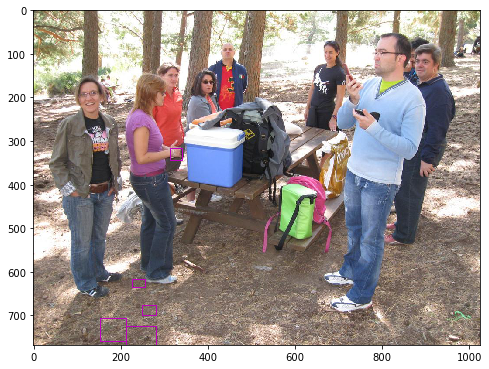

In [119]:
# im = np.random.choice(os.listdir(train_dir + image_dir))
im = os.listdir(train_dir + image_dir)[0]
img_filename = train_dir +image_dir + im
ann_filename = train_dir +annot_dir +im[:-4] +'.mat'


f, ax = plt.subplots(1,1,figsize=(8,8))
get_bbox(ann_filename)
img = cv2.imread(img_filename)
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
for box in get_bbox(ann_filename):
    x_min,y_min,x_max,y_max = box
    rect = patches.Rectangle((x_min,y_min),x_max-x_min,y_max-y_min,ec='m',fill=False)
    ax.add_patch(rect)
plt.show()

In [118]:
(x_min*img.shape[1],x_max*img.shape[1])

(320167.04935926787, 349067.1467191632)

In [121]:
y_min

879.28279280372

In [70]:
img = cv2.imread(img_file)

[(348.6284728614119, 879.28279280372),
 (341.312703609176, 915.5523326443085),
 (377.7048604719211, 922.8928344364233),
 (385.020629724157, 886.6232945958347)]

In [ ]:
for box in mat['boxes'][0]:
    coords.append(list())
    c = 0
    for d in box[0][0]:
        if c > 3:
            break
        coords[i].append((d[0][0], d[0][1]))
        c += 1
    i += 1
return coords

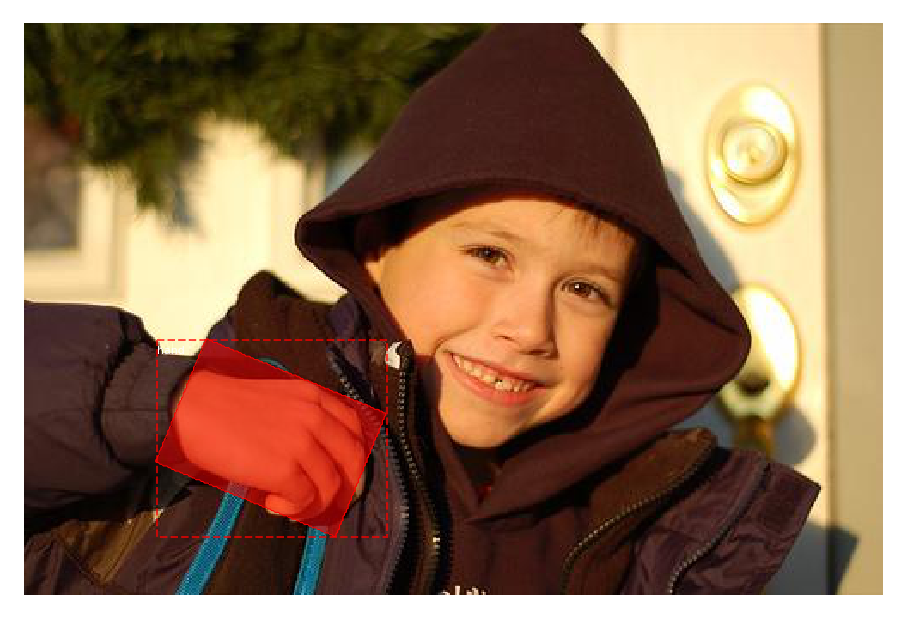

In [24]:
# display image with masks and bounding boxes
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes
import scipy.io
import os
from tqdm.notebook import tqdm
import numpy as np
import cv2


# class that defines and loads the kangaroo dataset
class HandsDataset(Dataset):
    # load the dataset definitions
    def load_dataset(self, dataset_dir, data_type='train'):
        # define one class
        self.add_class("dataset", 1, "hand")
        # define data locations
        images_dir = dataset_dir + data_type + '_data/images/'
        annotations_dir = dataset_dir + data_type + '_data/annotations/'
        img_names = [name.split('.')[0] for name in os.listdir(images_dir)]
        for img_idx, img_name in enumerate(tqdm(img_names)):
            if img_name == '':
                continue
            self.add_image(source='dataset',
                           image_id=img_idx,
                           path=images_dir + img_name + '.jpg',
                           annotation=annotations_dir + img_name + '.mat')

    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        # define box file location
        path = info['annotation']
        # load XML
        boxes = self.coords_from_mat(path)
        box_array = np.array([[(x, y) for y, x in box] for box in boxes])
        path = info['path']
        img = cv2.imread(path)
        height = img.shape[0]
        width = img.shape[1]
        # create one array for all masks, each on a different channel
        masks = np.zeros((height, width, len(boxes)), dtype='uint8')
        # create masks
        class_ids = list()
        for i_box, box in enumerate(box_array):
            e_mask = np.zeros_like(img[:, :, 1])
            masks[:, :, i_box] = cv2.fillPoly(e_mask, [box.astype(np.int32)], 1)
            class_ids.append(self.class_names.index('hand'))
        return masks, asarray(class_ids, dtype='int32')

    # load an image reference  <---- This in the second of the 2 required functions
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

    def coords_from_mat(self,mat_filepath):
        mat = scipy.io.loadmat(mat_filepath)
        coords = []
        i = 0
        for e in mat['boxes'][0]:
            coords.append(list())
            c = 0
            for d in e[0][0]:
                if c > 3:
                    break
                coords[i].append((d[0][0], d[0][1]))
                c += 1
            i += 1
        return coords


# train set
train_set = HandsDataset()
train_set.load_dataset('./datasets/hands/')
train_set.prepare()
# define image id
image_id = 176
# load the image
image = train_set.load_image(image_id)
# load the masks and the class ids
mask, class_ids = train_set.load_mask(image_id)
# extract bounding boxes from the masks
bbox = extract_bboxes(mask)
# display image with masks and bounding boxes
display_instances(image, bbox, mask, class_ids, train_set.class_names)


In [19]:
train_set.class_names

AttributeError: 'HandsDataset' object has no attribute 'class_names'

In [ ]:
# fit a mask rcnn on the hands dataset
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.utils import Dataset
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes
import scipy.io
import os
from tqdm import tqdm
import numpy as np
import cv2


# class that defines and loads the kangaroo dataset
class HandsDataset(Dataset):
    # load the dataset definitions
    def load_dataset(self, dataset_dir, data_type='train'):
        # define one class
        self.add_class("dataset", 1, "hand")
        # define data locations
        images_dir = dataset_dir + data_type + '_data/images/'
        annotations_dir = dataset_dir + data_type + '_data/annotations/'
        img_names = [name.split('.')[0] for name in os.listdir(images_dir)]
        for img_idx, img_name in enumerate(tqdm(img_names)):
            if img_name == '':
                continue
            self.add_image(source='dataset',
                           image_id=img_idx,
                           path=images_dir + img_name + '.jpg',
                           annotation=annotations_dir + img_name + '.mat')

    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        # define box file location
        path = info['annotation']
        # load XML
        boxes = self.coords_from_mat(path)
        box_array = np.array([[(x, y) for y, x in box] for box in boxes])
        path = info['path']
        img = cv2.imread(path)
        height = img.shape[0]
        width = img.shape[1]
        # create one array for all masks, each on a different channel
        masks = np.zeros((height, width, len(boxes)), dtype='uint8')
        # create masks
        class_ids = list()
        for i_box, box in enumerate(box_array):
            e_mask = np.zeros_like(img[:, :, 1])
            masks[:, :, i_box] = cv2.fillPoly(e_mask, [box.astype(np.int32)], 1)
            class_ids.append(self.class_names.index('hand'))
        return masks, np.asarray(class_ids, dtype='int32')

    # load an image reference  <---- This in the second of the 2 required functions
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

    def coords_from_mat(self, mat_filepath):
        mat = scipy.io.loadmat(mat_filepath)
        coords = []
        i = 0
        for e in mat['boxes'][0]:
            coords.append(list())
            c = 0
            for d in e[0][0]:
                if c > 3:
                    break
                coords[i].append((d[0][0], d[0][1]))
                c += 1
            i += 1
        return coords

    # load an image reference  <---- This in the second of the 2 required functions
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

    def coords_from_mat(self,mat_filepath):
        mat = scipy.io.loadmat(mat_filepath)
        coords = []
        i = 0
        for e in mat['boxes'][0]:
            coords.append(list())
            c = 0
            for d in e[0][0]:
                if c > 3:
                    break
                coords[i].append((d[0][0], d[0][1]))
                c += 1
            i += 1
        return coords


# define a configuration for the model
class HandsConfig(Config):
    # define the name of the configuration
    NAME = "hands_cfg"
    # number of classes (background + kangaroo)
    NUM_CLASSES = 1 + 1
    # number of training steps per epoch
    STEPS_PER_EPOCH = 10
    IMAGES_PER_GPU = 1


# prepare train set
train_set = HandsDataset()
train_set.load_dataset('./datasets/hands/', 'train')
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))
# prepare test/val set
test_set = HandsDataset()
test_set.load_dataset('./datasets/hands/', 'val')
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))
# prepare config
config = HandsConfig()
config.display()
# define the model
model = MaskRCNN(mode='training', model_dir='./', config=config)
# load weights (mscoco) and exclude the output layers
model.load_weights('mask_rcnn_coco.h5', by_name=True,
                   exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])
# train weights (output layers or 'heads')
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=5, layers='heads')


Using TensorFlow backend.
100%|██████████| 740/740 [00:00<00:00, 205385.45it/s]

Train: 4069
Test: 738

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead

Starting at epoch 0. LR=0.001

Checkpoint Path: ./hands_cfg20200128T1920/mask_rcnn_hands_cfg_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         

/home/sagiv/anaconda3/envs/Mask_RCNN/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/sagiv/anaconda3/envs/Mask_RCNN/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/sagiv/anaconda3/envs/Mask_RCNN/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


/home/sagiv/anaconda3/envs/Mask_RCNN/lib/python3.7/site-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'
